In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('news.csv')
data=data.sample(n=len(data))
print(data.shape)

(6335, 4)


In [3]:
data.head()

,Unnamed: 0,title,text,label
182,3008,Iran carries out new ballistic missile test,Iran successfully test-fired a medium-range ba...,REAL
1509,6405,"FBI Found ""Tens Of Thousands Of Emails"" Belong...","FBI Found ""Tens Of Thousands Of Emails"" Belong...",FAKE
1309,8879,BREAKING: Trump Rushed Off Stage After Alleged...,"With Election Day only three days away, tensio...",FAKE
591,9253,"James Comey to be taken out, knows too much ab...","James Comey to be taken out, knows too much ab...",FAKE
988,322,"David Sweat shot, captured alive after New Yor...","Malone, New York (CNN) After a massive, more-t...",REAL


In [4]:
data=data[['text','label']]
data.head()

,text,label
182,Iran successfully test-fired a medium-range ba...,REAL
1509,"FBI Found ""Tens Of Thousands Of Emails"" Belong...",FAKE
1309,"With Election Day only three days away, tensio...",FAKE
591,"James Comey to be taken out, knows too much ab...",FAKE
988,"Malone, New York (CNN) After a massive, more-t...",REAL


In [0]:
train_feature,test_feature,train_label,test_label=train_test_split(data['text'],data['label'],test_size=0.2,random_state=7)

In [0]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
train_feature=tfidf_vectorizer.fit_transform(train_feature) 
test_feature=tfidf_vectorizer.transform(test_feature)

In [0]:
def classification(classifier,train_feature,test_feature,train_label,test_label):
  model= classifier
  model.fit(train_feature, train_label)
  predicted_label = model.predict(test_feature)
  accuracy=accuracy_score(predicted_label,test_label)*100
  conf_matrix=confusion_matrix(predicted_label,test_label, labels=['FAKE','REAL'])
  conf_matrix=pd.DataFrame(conf_matrix,columns=['FAKE','REAL'],index=['FAKE','REAL'])
  return accuracy,conf_matrix



In [0]:

classifiers = [
    SVC(kernel="linear", C=0.25),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SGDClassifier(max_iter=50),
    LogisticRegression(C=1e4,max_iter=50)
    ]


classifier_names =[
    "LinearKernel",
    "RBFKernel",
    "Decision Tree", 
    "Random Forest",
    "SGD",
    "Logistic Regression"                 
]


In [0]:
def plot(values,name):
  x_values=["TruePositive","TrueNegative","FalsePositive","FalseNegative"]
  plt.bar(x_values,values,align='center')
  plt.title(f'confusion matrix of {name}')
  plt.xlabel('Truth Values')
  plt.ylabel('Count')
  plt.show()



-----------------------LinearKernel------------------------

accuracy : 91.79163378058406 

confusion Matrix :
 
      FAKE  REAL
FAKE   624    68
REAL    36   539



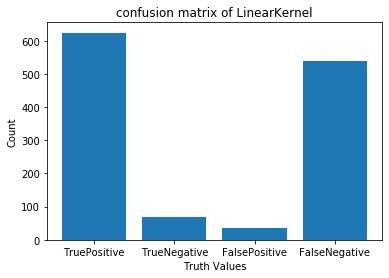


-----------------------RBFKernel------------------------

accuracy : 91.71270718232044 

confusion Matrix :
 
      FAKE  REAL
FAKE   632    77
REAL    28   530



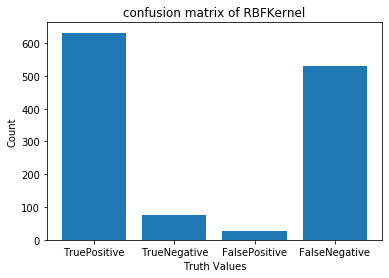


-----------------------Decision Tree------------------------

accuracy : 81.21546961325967 

confusion Matrix :
 
      FAKE  REAL
FAKE   531   109
REAL   129   498



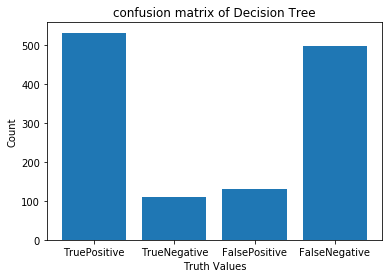

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



-----------------------Random Forest------------------------

accuracy : 83.82004735595896 

confusion Matrix :
 
      FAKE  REAL
FAKE   581   126
REAL    79   481



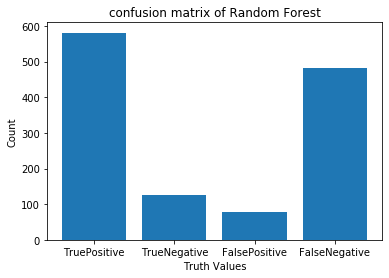


-----------------------SGD------------------------

accuracy : 94.31728492501973 

confusion Matrix :
 
      FAKE  REAL
FAKE   625    37
REAL    35   570



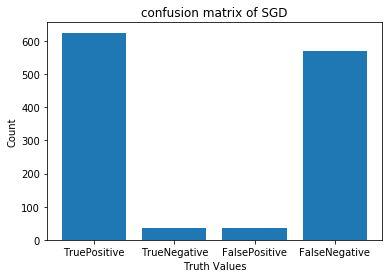

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



-----------------------Logistic Regression------------------------

accuracy : 94.39621152328334 

confusion Matrix :
 
      FAKE  REAL
FAKE   627    38
REAL    33   569



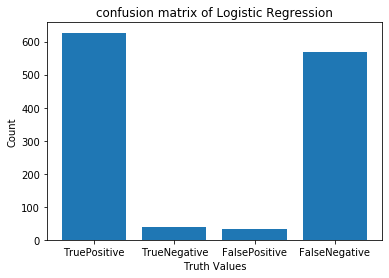

In [10]:
acc=[]
values=[]
for name,classifier in zip(classifier_names,classifiers):
  accuracy,conf_matrix=classification(classifier,train_feature,test_feature,train_label,test_label)
  print(f"\n-----------------------{name}------------------------\n")
  print(f"accuracy : {accuracy} \n")
  print(f"confusion Matrix :\n \n{conf_matrix}\n")
  acc.append(accuracy)
  plot(list(conf_matrix.values.flatten()),name)

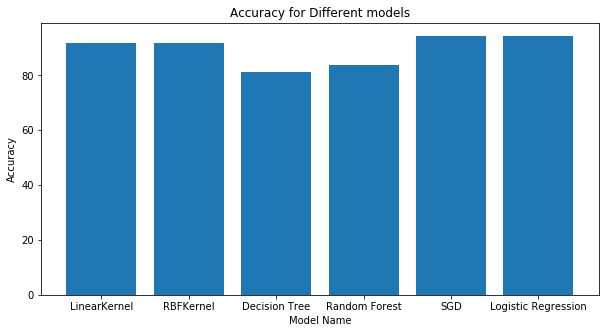

In [14]:
plt.figure(figsize=(10,5))
plt.bar(classifier_names,acc,align='center')
plt.title('Accuracy for Different models')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()